# **Goal: Classify flowers into species using petal/sepal measurements.**

## **Algorithm: K-Nearest Neighbors**

### **Steps:**

1.Load the Iris dataset.

2.Train K-NN with different values of k (try 1, 3, 5, 7).

3.Plot accuracy vs. k to see how it changes.

4.Compare performance with logistic regression.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
iris = load_iris(return_X_y=False, as_frame=False)
X = iris.data         
y = iris.target       

print(X.shape, y.shape)  

(150, 4) (150,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
X_train.shape   # (120, 4)

(120, 4)

In [5]:
X_test.shape    # (30, 4)

(30, 4)

In [6]:
y_train.shape   # (120,)

(120,)

In [7]:
y_test.shape    # (30,)

(30,)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
k_values = [1, 3, 5, 7]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k}, Accuracy={acc:.4f}")

k=1, Accuracy=1.0000
k=3, Accuracy=1.0000
k=5, Accuracy=1.0000
k=7, Accuracy=1.0000


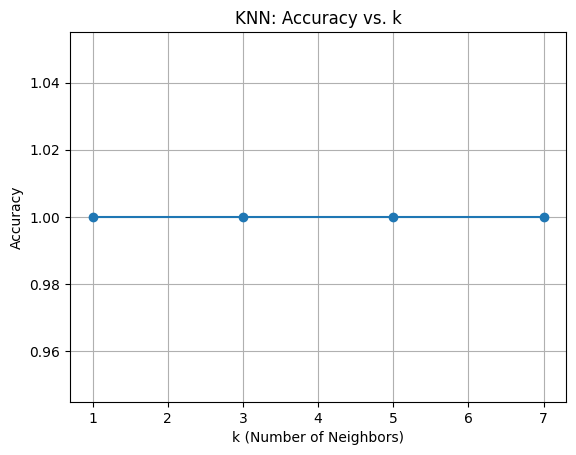

In [10]:
plt.plot(k_values, accuracies, marker='o')
plt.title("KNN: Accuracy vs. k")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [11]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_scaled, y_train)
y_pred_lr = logreg.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy = {accuracy_lr:.4f}")

Logistic Regression Accuracy = 1.0000
